In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from PIL import Image
import os
import pathlib
import random


In [3]:
path = '/content/drive/MyDrive/Dataset'
data_dir = pathlib.Path(path)

In [4]:
class_names = np.array([item.name for item in data_dir.glob("*")])
class_names



benignPath = pathlib.Path(os.path.join(data_dir,'benign'))
normalPath = pathlib.Path(os.path.join(data_dir,'normal'))
malignantPath = pathlib.Path(os.path.join(data_dir,'malignant'))

In [5]:
benignImageCount = len(list(benignPath.glob('*.png')))
malignantImageCount = len(list(malignantPath.glob('*.png')))
normalImageCount = len(list(normalPath.glob('*.png')))
totalImageCount = benignImageCount + malignantImageCount + normalImageCount

print("Total number of Images: ", totalImageCount)
print("No. of Benign (non-dangerous) Images: {}({})".format(benignImageCount, round(benignImageCount*100/totalImageCount, 2)))
print("No. of Malignant (dangerous) Images: {}({})".format(malignantImageCount, round(malignantImageCount*100/totalImageCount, 2)))
print("No. of Normal (No Traces) Images: {}({})".format(normalImageCount, round(normalImageCount*100/totalImageCount, 2)))

"""# Build the CNN"""

batch_size = 32
img_height = 224
img_width = 224

Total number of Images:  1439
No. of Benign (non-dangerous) Images: 752(52.26)
No. of Malignant (dangerous) Images: 421(29.26)
No. of Normal (No Traces) Images: 266(18.49)


In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

val_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 1439 files belonging to 3 classes.
Using 1152 files for training.
Found 1439 files belonging to 3 classes.
Using 287 files for validation.


In [7]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import layers, models


In [8]:
base_model = DenseNet201(input_shape=(img_height, img_width, 3),
                         include_top=False,  # Exclude the top (fully connected) layers
                         weights='imagenet')

# Freeze the base model
base_model.trainable = False


74836368/74836368 [==============================] - 0s 0us/step


In [9]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(optimizer="Adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [ ]:
epochs = 10
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


36/36 [==============================] - 539s 13s/step - loss: 0.6603 - accuracy: 0.6962 - val_loss: 0.4149 - val_accuracy: 0.8223
Epoch 2/10
36/36 [==============================] - 417s 12s/step - loss: 0.4249 - accuracy: 0.8056 - val_loss: 0.3522 - val_accuracy: 0.8641
Epoch 3/10
36/36 [==============================] - 414s 11s/step - loss: 0.3931 - accuracy: 0.8316 - val_loss: 0.3302 - val_accuracy: 0.8571
Epoch 4/10
36/36 [==============================] - 406s 11s/step - loss: 0.3495 - accuracy: 0.8576 - val_loss: 0.2996 - val_accuracy: 0.8746
Epoch 5/10
36/36 [==============================] - 397s 11s/step - loss: 0.3394 - accuracy: 0.8542 - val_loss: 0.3143 - val_accuracy: 0.8537
Epoch 6/10
36/36 [==============================] - 398s 11s/step - loss: 0.3310 - accuracy: 0.8655 - val_loss: 0.2944 - val_accuracy: 0.8711
Epoch 7/10
36/36 [==============================] - 397s 11s/step - loss: 0.2839 - accuracy: 0.8828 - val_loss: 0.2805 - val_accuracy: 0.8955
Epoch 8/10
36/36 

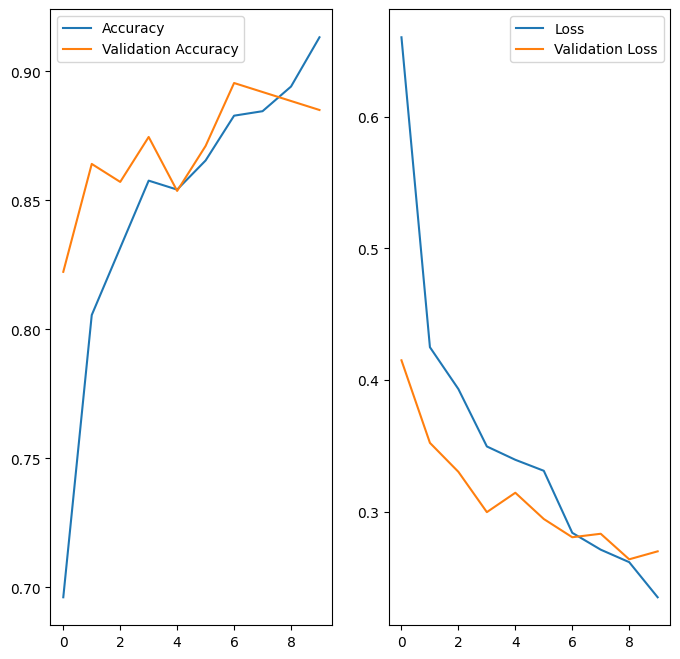

9/9 [==============================] - 78s 9s/step - loss: 0.2698 - accuracy: 0.8850
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3

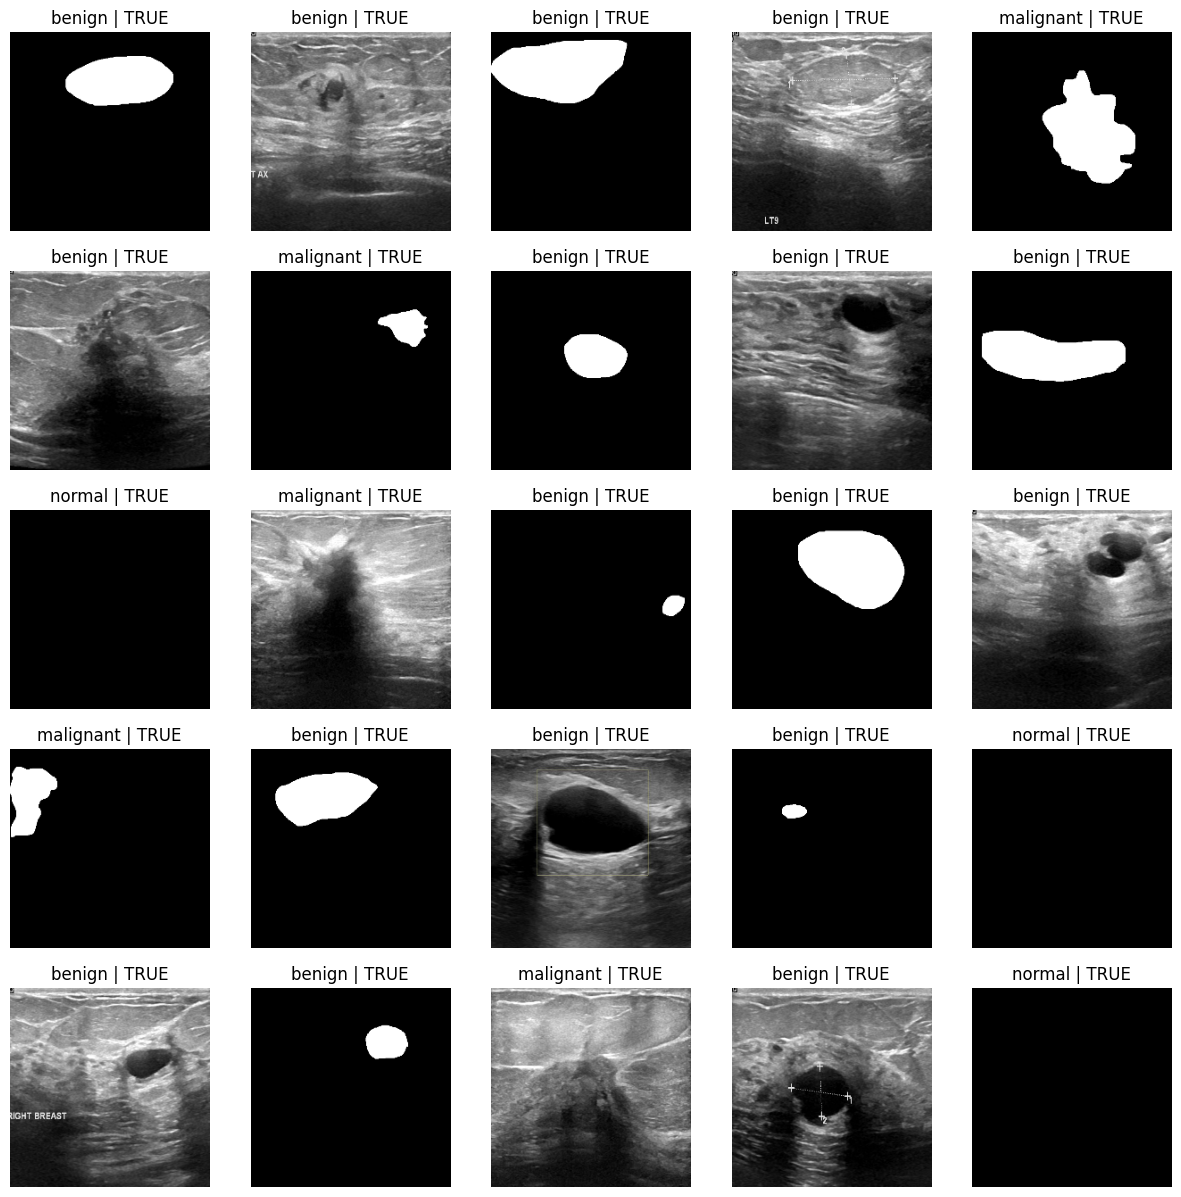

In [ ]:
history.history.keys()

"""# Accuracy vs Loss"""

acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

"""**Evaluating - It returns the loss and accuracy**"""

model.evaluate(val_data)

"""**Model summary**"""

model.summary()

"""# Predictions Testing Model"""

plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):

        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)

        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result)
        plt.axis("off")

In [ ]:
loss, accuracy = model.evaluate(val_data)
print(f"Model accuracy: {accuracy * 100:.2f}%")

9/9 [==============================] - 81s 9s/step - loss: 0.2698 - accuracy: 0.8850
Model accuracy: 88.50%
